In [1]:
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential,load_model
from keras.layers import Dense
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU, ReLU, Dropout
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator


import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# hyperparameter
batch_size = 64
epochs = 12
class_img = ['Cao Minh Quan', 'Huynh Anh DUy', 'Le Tri Dung', 'Nguyen Hai Hoang', 'Nguyen Ngoc Nhan']


load_dataset = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True)

train_loader=load_dataset.flow_from_directory('/kaggle/input/face-class/Face/Train',target_size=(32,32), batch_size=128, class_mode='categorical')
valid_loader=load_dataset.flow_from_directory('/kaggle/input/face-class/Face/Val',target_size=(32,32), batch_size=128, class_mode='categorical')

train_loader.class_indices

Found 228 images belonging to 5 classes.
Found 51 images belonging to 5 classes.


{'CaoMinhQuan': 0,
 'HuynhAnhDUy': 1,
 'LeTriDung': 2,
 'NguyenHaiHoang': 3,
 'NguyenNgocNhan': 4}

In [3]:
model = Sequential()
model.add(Conv2D(32,(3,3), padding = 'same', input_shape=(32,32,3), strides= (2,2)))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(64, (3,3), strides=(1,1), padding='same'))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(128, (3,3), strides=(1,1), padding='same'))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
          

model.add(Flatten())
model.add(Dense(124, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 64)          0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                    

In [4]:
sgd = SGD(lr = 0.0001, decay = 1e-4, momentum = 0.9, nesterov= True)
model.compile(loss= 'categorical_crossentropy', optimizer= Adam(), metrics = ['accuracy'])
train = model.fit(train_loader,validation_data=valid_loader, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/12
2/2 [==============================] - 8s 3s/step - loss: 1.6038 - accuracy: 0.2675 - val_loss: 1.5646 - val_accuracy: 0.2941
Epoch 2/12
2/2 [==============================] - 6s 3s/step - loss: 1.5579 - accuracy: 0.3026 - val_loss: 1.5153 - val_accuracy: 0.3137
Epoch 3/12
2/2 [==============================] - 6s 4s/step - loss: 1.4965 - accuracy: 0.3465 - val_loss: 1.4347 - val_accuracy: 0.4902
Epoch 4/12
2/2 [==============================] - 6s 4s/step - loss: 1.4115 - accuracy: 0.4518 - val_loss: 1.2981 - val_accuracy: 0.6078
Epoch 5/12
2/2 [==============================] - 6s 4s/step - loss: 1.3176 - accuracy: 0.4781 - val_loss: 1.1729 - val_accuracy: 0.6667
Epoch 6/12
2/2 [==============================] - 6s 3s/step - loss: 1.2288 - accuracy: 0.5526 - val_loss: 1.0437 - val_accuracy: 0.7647
Epoch 7/12
2/2 [==============================] - 6s 3s/step - loss: 1.1006 - accuracy: 0.6096 - val_loss: 0.8703 - val_accuracy: 0.8235
Epoch 8/12
2/2 [=========================

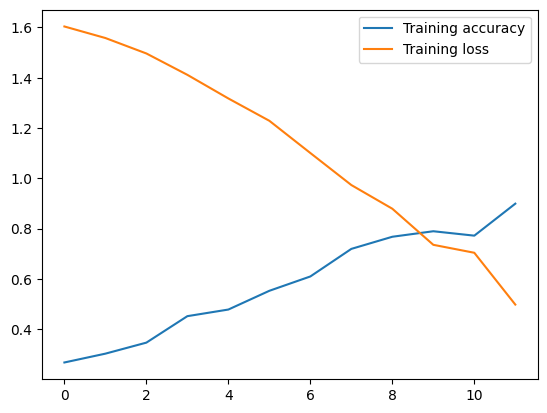

In [5]:
accuracy = train.history['accuracy']
loss = train.history['loss']
plt.plot(accuracy, label='Training accuracy')
plt.plot(loss, label='Training loss')
plt.legend()
plt.show()

In [6]:
# save model
model.save("Face.h5")

# Loade model
model_load=load_model('Face.h5')

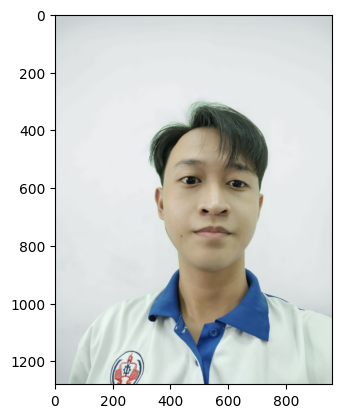

1/1 [==============================] - 0s 118ms/step
Nguyen Ngoc Nhan


In [7]:
import PIL.Image as Image
from keras.utils import load_img, img_to_array

url = '/kaggle/input/face-class/Face/Test/NguyenNgocNhan.jpg'
# Load ảnh
img = Image.open(url)


# Hiển thị ảnh
plt.imshow(img)
plt.show()

img=load_img(url,target_size=(32,32))
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)

result=(model_load.predict(img).argmax())
print(class_img[result])